In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q ultralytics roboflow pyyaml albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [ ]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import yaml
from roboflow import Roboflow
from IPython.display import Image, display
from ultralytics import YOLO
import torch
import albumentations as A

In [ ]:
try:
    rf = Roboflow(api_key="no1ZYfblbLE1rpcBgNOB")
    project = rf.workspace("stubbornstrawsberries").project("fisheye8k")
    version = project.version(7)
    dataset = version.download("yolov11")
    dataset_location = dataset.location
    print(f"downloaded at {dataset_location}")
except Exception as e:
    print(f"error {e}")
    dataset_location = None


def summarize_dataset(location):
    print("\n-analyzing data-")
    try:
        data_yaml_path = os.path.join(location, 'data.yaml')
        with open(data_yaml_path, 'r') as f:
            data = yaml.safe_load(f)

        num_train = len(os.listdir(os.path.join(location, data['train'].replace('../', ''))))
        num_val = len(os.listdir(os.path.join(location, data['val'].replace('../', ''))))
        num_test = len(os.listdir(os.path.join(location, data['test'].replace('../', ''))))

        print(f"(Classes): {data['names']}")
        print(f"layers{data['nc']}")
        print(f"Train: {num_train}")
        print(f"Validation: {num_val}")
        print(f"Test: {num_test}")
    except Exception as e:
        print(f"error {e}")

if dataset_location:
    summarize_dataset(dataset_location)

print("All Done!")
print("-" * 70)

loading Roboflow workspace...
loading Roboflow project...
downloaded at /content/Fisheye8K-7

-analyzing data-
(Classes): ['0', '1', '2', '3', '4']
layers5
Train: 3560
Validation: 506
Test: 255
All Done!
----------------------------------------------------------------------


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolo11m.pt")  # path to your .pt file

# Run detection on a single image
results = model("Fisheye8K-7/test/images/camera1_A_104_png.rf.027072b446967c8f8b02aa6d6bb0fdd4.jpg", save=True)

# Optional: Print results
for result in results:
    print(result.boxes.xyxy)  # bounding box coordinates
    print(result.boxes.cls)   # class IDs
    print(result.boxes.conf)  # confidence scores


image 1/1 /content/Fisheye8K-7/test/images/camera1_A_104_png.rf.027072b446967c8f8b02aa6d6bb0fdd4.jpg: 640x640 2 cars, 1 airplane, 1 train, 1639.7ms
Speed: 15.1ms preprocess, 1639.7ms inference, 36.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
tensor([[145.8276, 170.2140, 211.3881, 299.8960],
        [284.2942,  55.6774, 301.3337,  69.6343],
        [  3.1166,   2.6733, 636.3735, 638.3702],
        [  2.0146,   3.7208, 634.6577, 638.0391]])
tensor([2., 2., 6., 4.])
tensor([0.7619, 0.2820, 0.2814, 0.2791])


Displaying image: runs/detect/predict/camera1_A_104_png.rf.027072b446967c8f8b02aa6d6bb0fdd4.jpg


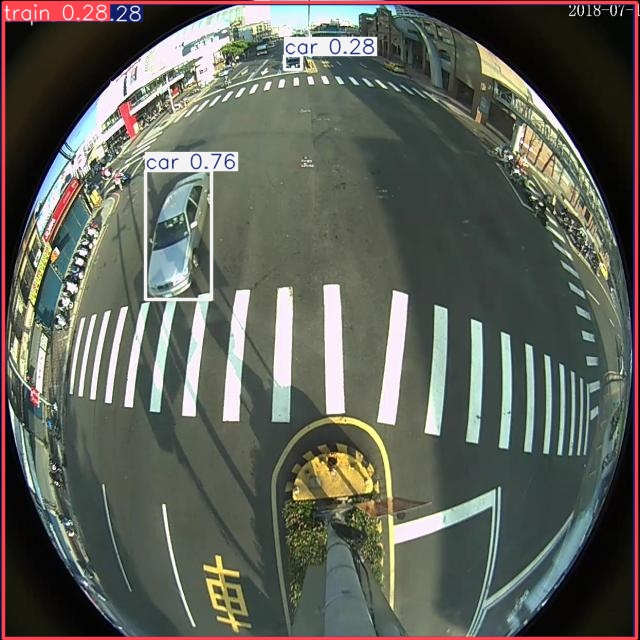

In [ ]:
# prompt: print out the images with bounding boxes

# Get the directory where results are saved
results_dir = results[0].save_dir

# Get a list of saved image files (assuming they are saved as .jpg)
saved_images = glob.glob(os.path.join(results_dir, "*.jpg"))

# Display each saved image
for img_path in saved_images:
    print(f"Displaying image: {img_path}")
    display(Image(filename=img_path))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: strip the images with bounding boxes into drive/MyDrive/ML/CROPP, for each car, etc create a separate folder in this location

# Create the base directory for cropped images in Google Drive
base_crop_dir = '/content/drive/MyDrive/ML/CROPP'
os.makedirs(base_crop_dir, exist_ok=True)

# Define the class names
classes = model.names # Assuming model.names contains the list of class names

# Iterate through the detection results
for i, result in enumerate(results):
    img_path = result.path # Get the path of the processed image
    img = cv2.imread(img_path) # Load the image

    if img is None:
        print(f"Warning: Could not read image {img_path}. Skipping.")
        continue

    # Get the bounding boxes, class IDs, and confidence scores
    boxes = result.boxes.xyxy.cpu().numpy()
    cls_ids = result.boxes.cls.cpu().numpy().astype(int)
    confs = result.boxes.conf.cpu().numpy()

    # Iterate through each detected object in the image
    for j in range(len(boxes)):
        x1, y1, x2, y2 = map(int, boxes[j])
        cls_id = cls_ids[j]
        conf = confs[j]
        class_name = classes[cls_id]

        # Create a directory for the class if it doesn't exist
        class_crop_dir = os.path.join(base_crop_dir, class_name)
        os.makedirs(class_crop_dir, exist_ok=True)

        # Crop the bounding box
        cropped_img = img[y1:y2, x1:x2]

        # Generate a unique filename for the cropped image
        # Using the original image name, object index, and confidence
        original_img_name = os.path.basename(img_path).split('.')[0]
        crop_filename = f"{original_img_name}_obj{j}_conf{conf:.2f}.jpg"
        crop_filepath = os.path.join(class_crop_dir, crop_filename)

        # Save the cropped image to the class directory
        cv2.imwrite(crop_filepath, cropped_img)
        print(f"Saved cropped {class_name} to {crop_filepath}")



Saved cropped car to /content/drive/MyDrive/ML/CROPP/car/camera1_A_104_png_obj0_conf0.76.jpg
Saved cropped car to /content/drive/MyDrive/ML/CROPP/car/camera1_A_104_png_obj1_conf0.28.jpg
Saved cropped train to /content/drive/MyDrive/ML/CROPP/train/camera1_A_104_png_obj2_conf0.28.jpg
Saved cropped airplane to /content/drive/MyDrive/ML/CROPP/airplane/camera1_A_104_png_obj3_conf0.28.jpg


In [ ]:
# prompt: make sure the yaml file label 0	bus
# 1	bikes
# 2	cars
# 3	pedestrian
# 4	truck

# Ensure the data.yaml file has the correct 'names' mapping
data_yaml_path = os.path.join(dataset_location, 'data.yaml')

with open(data_yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Define the correct class names
correct_names = ['bus', 'bikes', 'cars', 'pedestrian', 'truck']

# Check if the existing names match the correct ones
if data.get('names') != correct_names:
    print("Updating 'names' in data.yaml")
    data['names'] = correct_names
    with open(data_yaml_path, 'w') as f:
        yaml.dump(data, f)
else:
    print("'names' in data.yaml is already correct.")

# Re-summarize to show the updated class names
if dataset_location:
    summarize_dataset(dataset_location)


Updating 'names' in data.yaml

-analyzing data-
(Classes): ['bus', 'bikes', 'cars', 'pedestrian', 'truck']
layers5
Train: 3560
Validation: 506
Test: 255


In [ ]:
import os
import cv2
import yaml

In [ ]:
# Load the trained YOLOv11 model
model = YOLO("yolo11m.pt")

# Define the path to your dataset
# Assuming dataset_location is available from previous cells
dataset_location = "Fisheye8K-7" # Replace with the actual dataset location

# Define the path to the test images
test_images_dir = os.path.join(dataset_location, 'test', 'images')

# Define the path to the test labels (optional, for comparison)
test_labels_dir = os.path.join(dataset_location, 'test', 'labels')

# Define the output directory in Google Drive for cropped images
base_crop_dir = '/content/drive/MyDrive/ML/CROPP_Test_Predictions'
os.makedirs(base_crop_dir, exist_ok=True)

# Define the classes to crop
classes_to_crop = ['bus', 'truck', 'cars']

# Get the class names from the model or data.yaml
# It's good practice to load from data.yaml for consistency with training
data_yaml_path = os.path.join(dataset_location, 'data.yaml')
with open(data_yaml_path, 'r') as f:
    data = yaml.safe_load(f)
all_class_names = data.get('names', [])

# Create directories for the specific classes to crop
for class_name in classes_to_crop:
    class_crop_dir = os.path.join(base_crop_dir, class_name)
    os.makedirs(class_crop_dir, exist_ok=True)

# Get a list of all image files in the test set
test_image_paths = [os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(test_image_paths)} test images.")

# Process each image in the test set
for img_path in test_image_paths:
    print(f"Processing image: {img_path}")

    # Run inference
    results = model(img_path)

    # Load the image using OpenCV to crop later
    img = cv2.imread(img_path)

    if img is None:
        print(f"Warning: Could not read image {img_path}. Skipping.")
        continue

    # Process results
    for result in results:
        boxes = result.boxes.xyxy.cpu().numpy()
        cls_ids = result.boxes.cls.cpu().numpy().astype(int)
        confs = result.boxes.conf.cpu().numpy()

        # Iterate through each detected object in the image
        for j in range(len(boxes)):
            x1, y1, x2, y2 = map(int, boxes[j])
            cls_id = cls_ids[j]
            conf = confs[j]

            # Ensure the class_id is within the range of known classes
            if 0 <= cls_id < len(all_class_names):
                class_name = all_class_names[cls_id]

                # Check if this class is one we want to crop
                if class_name in classes_to_crop:
                    # Crop the bounding box
                    cropped_img = img[y1:y2, x1:x2]

                    # Generate a unique filename for the cropped image
                    original_img_name = os.path.basename(img_path).split('.')[0]
                    crop_filename = f"{original_img_name}_obj{j}_{class_name}_conf{conf:.2f}.jpg"
                    crop_filepath = os.path.join(base_crop_dir, class_name, crop_filename)

                    # Save the cropped image to the specific class directory
                    try:
                        cv2.imwrite(crop_filepath, cropped_img)
                        print(f"Saved cropped {class_name} to {crop_filepath}")
                    except Exception as e:
                        print(f"Error saving cropped image {crop_filepath}: {e}")

            else:
                print(f"Warning: Detected object with unknown class ID: {cls_id}")

print("Finished processing test set and cropping specified objects.")

Found 255 test images.
Processing image: Fisheye8K-7/test/images/camera7_A_235_png.rf.3aca43aa5ad00c40f4eb54cf3d2720ad.jpg

image 1/1 /content/Fisheye8K-7/test/images/camera7_A_235_png.rf.3aca43aa5ad00c40f4eb54cf3d2720ad.jpg: 640x640 2 cars, 1861.9ms
Speed: 9.6ms preprocess, 1861.9ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)
Saved cropped cars to /content/drive/MyDrive/ML/CROPP_Test_Predictions/cars/camera7_A_235_png_obj0_cars_conf0.78.jpg
Saved cropped cars to /content/drive/MyDrive/ML/CROPP_Test_Predictions/cars/camera7_A_235_png_obj1_cars_conf0.43.jpg
Processing image: Fisheye8K-7/test/images/camera4_N_154_png.rf.e143d8dfe06544bc9deb21803b7ce7ca.jpg

image 1/1 /content/Fisheye8K-7/test/images/camera4_N_154_png.rf.e143d8dfe06544bc9deb21803b7ce7ca.jpg: 640x640 1 car, 1980.1ms
Speed: 2.8ms preprocess, 1980.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Saved cropped cars to /content/drive/MyDrive/ML/CROPP_Test_Predictions/cars/camera4_N_154_